<a href="https://colab.research.google.com/github/stealthOG/Skill_Lab/blob/main/Kanye_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 1.3 MB/s 


In [2]:
import pandas as pd

In [3]:
import snscrape.modules.twitter as sntwitter

In [4]:
query = "kanye west lang:en until:2022-01-01 since:2012-01-01"

tweets = []
limit = 5000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) == limit:
    break
  else:
    tweets.append([tweet.date, tweet.user.username, tweet.content])

df1 = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])

In [5]:
df1


,Date,User,Tweet
0,2021-12-31 23:59:18+00:00,_sf_25_,@everytimestyIe @oliviarodrigo @billieeilish @...
1,2021-12-31 23:59:11+00:00,tiktokiscancer,Betty white really saw the rise of fascism and...
2,2021-12-31 23:58:52+00:00,PapiLOADED,The fact that Khloe Kardashian Kanye West and ...
3,2021-12-31 23:58:41+00:00,swiftwaveradio,#NowPlaying @KanyeWest - Power #SWIFTWAVERADIO...
4,2021-12-31 23:57:38+00:00,cozymoD,That’s wild! @kanyewest wearing the same outfi...
...,...,...,...
4995,2021-12-30 04:50:31+00:00,seizuredog,@realztricky @Matthew59054736 @timdphilips @ed...
4996,2021-12-30 04:50:13+00:00,elementgs,@BoredSpaceApe @bxgeex @Stoniphantom @kanyewes...
4997,2021-12-30 04:50:11+00:00,Wakanda412,@d_plus_t @kanyewest I voted for him so I can ...
4998,2021-12-30 04:49:52+00:00,KeepinItGutta,@JamieGeorge93 @Stoniphantom @kanyewest 4 and ...


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [7]:
from textblob import TextBlob

In [8]:
import re

In [9]:
# create a clean tweet function

def Clean_tweet(twt):
    twt = re.sub(r'[^\w\s]' ,"", twt)
    twt = re.sub(r'#[A-Z]+', '', twt)
    twt = re.sub(r'#[a-z]+', '', twt)
    twt = re.sub(r'#[0-9]+', '', twt) 
    twt = re.sub(r'http\S+', '', twt)
    twt = re.sub(r'\\n', '', twt)
    return twt

In [10]:
# clean the tweet

df1['Clean_tweet'] = df1['Tweet'].apply(Clean_tweet)
df1.head()

,Date,User,Tweet,Clean_tweet
0,2021-12-31 23:59:18+00:00,_sf_25_,@everytimestyIe @oliviarodrigo @billieeilish @...,everytimestyIe oliviarodrigo billieeilish Adel...
1,2021-12-31 23:59:11+00:00,tiktokiscancer,Betty white really saw the rise of fascism and...,Betty white really saw the rise of fascism and...
2,2021-12-31 23:58:52+00:00,PapiLOADED,The fact that Khloe Kardashian Kanye West and ...,The fact that Khloe Kardashian Kanye West and ...
3,2021-12-31 23:58:41+00:00,swiftwaveradio,#NowPlaying @KanyeWest - Power #SWIFTWAVERADIO...,NowPlaying KanyeWest Power SWIFTWAVERADIO Lis...
4,2021-12-31 23:57:38+00:00,cozymoD,That’s wild! @kanyewest wearing the same outfi...,Thats wild kanyewest wearing the same outfit o...


In [11]:
# create 2 functions to get subjectivity and polarity

def get_subject(twt):
    return TextBlob(twt).sentiment.subjectivity

def get_polar(twt):
    return TextBlob(twt).sentiment.polarity

In [12]:
# create new columns for the subjectivity and polarity

df1['Subjectivity'] = df1['Clean_tweet'].apply(get_subject)
df1['Polarity'] = df1['Clean_tweet'].apply(get_polar)

df1.head()

,Date,User,Tweet,Clean_tweet,Subjectivity,Polarity
0,2021-12-31 23:59:18+00:00,_sf_25_,@everytimestyIe @oliviarodrigo @billieeilish @...,everytimestyIe oliviarodrigo billieeilish Adel...,0.500000,0.500000
1,2021-12-31 23:59:11+00:00,tiktokiscancer,Betty white really saw the rise of fascism and...,Betty white really saw the rise of fascism and...,0.100000,0.100000
2,2021-12-31 23:58:52+00:00,PapiLOADED,The fact that Khloe Kardashian Kanye West and ...,The fact that Khloe Kardashian Kanye West and ...,0.000000,0.000000
3,2021-12-31 23:58:41+00:00,swiftwaveradio,#NowPlaying @KanyeWest - Power #SWIFTWAVERADIO...,NowPlaying KanyeWest Power SWIFTWAVERADIO Lis...,0.500000,0.136364
4,2021-12-31 23:57:38+00:00,cozymoD,That’s wild! @kanyewest wearing the same outfi...,Thats wild kanyewest wearing the same outfit o...,0.416987,-0.050000


In [13]:
# create a function to get the sentiment analysis of kanye west tweet

def get_sentiment(score):
    if score > 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
df1['Sentiment'] = df1['Polarity'].apply(get_sentiment)

df1.head()

,Date,User,Tweet,Clean_tweet,Subjectivity,Polarity,Sentiment
0,2021-12-31 23:59:18+00:00,_sf_25_,@everytimestyIe @oliviarodrigo @billieeilish @...,everytimestyIe oliviarodrigo billieeilish Adel...,0.500000,0.500000,Negative
1,2021-12-31 23:59:11+00:00,tiktokiscancer,Betty white really saw the rise of fascism and...,Betty white really saw the rise of fascism and...,0.100000,0.100000,Negative
2,2021-12-31 23:58:52+00:00,PapiLOADED,The fact that Khloe Kardashian Kanye West and ...,The fact that Khloe Kardashian Kanye West and ...,0.000000,0.000000,Neutral
3,2021-12-31 23:58:41+00:00,swiftwaveradio,#NowPlaying @KanyeWest - Power #SWIFTWAVERADIO...,NowPlaying KanyeWest Power SWIFTWAVERADIO Lis...,0.500000,0.136364,Negative
4,2021-12-31 23:57:38+00:00,cozymoD,That’s wild! @kanyewest wearing the same outfi...,Thats wild kanyewest wearing the same outfit o...,0.416987,-0.050000,Positive


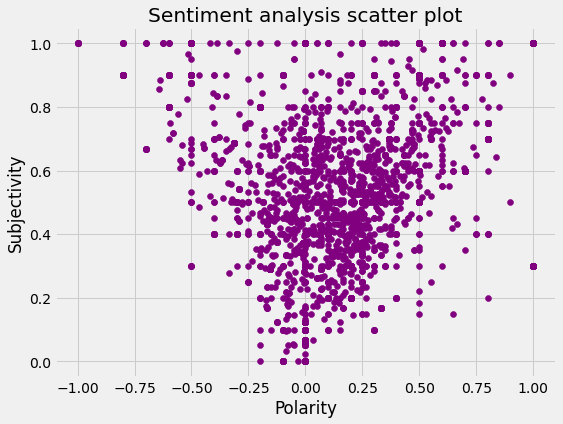

In [16]:
plt.figure(figsize=(8,6))
for i in range(0, df1.shape[0]):
    plt.scatter(df1['Polarity'][i], df1['Subjectivity'][i], color='Purple')
plt.title('Sentiment analysis scatter plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

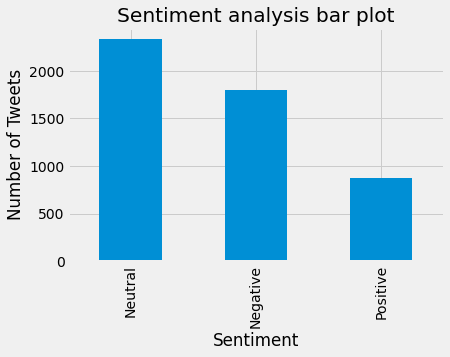

In [17]:
df1['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment analysis bar plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()